## How cultural background of fashion brands affects customers’ emotion?

Before starting my project, I would like to ask you a question: Will you be affected by the facial expression of models when deciding whether to purchase something? According to my research from my surrounding friends, their answer is “definitely yes”. Rather than an unformal survey without any authority, Sooyun Kim (2016) evaluated the influence of brand models' facial expressions, theme color, and decoration of stores will considerably impact the customer's willingness to purchase. In the meantime, the brand culture heavily influences how models post their facial expressions, which means that by modifying the types of emotional emotions the models displayed on their faces, the company's culture indirectly affects the behavior of customers.
Based on the argument above, I believe that there is a close relationship between the culture of brands and the emotional status of customers. However, the question, of how to computationally test the hypothesis, especially how to define and detect the brand culture and emotional status of customers, makes the project unapproachable. The data I used for this project, collected from Cornell University, is composed of information about 24,752 posts by 13,350 people on Instagram and basically searches for posts mentioning 48 internationally renowned fashion brand names as hashtags, which are listed below. The categories here mainly use the brand’s market value, history and culture, including Mega couture, Small couture, Designer, and High street.

| Brand category      | Brand name |
| :-----------: | :-----------: |
| Mega couture      | burberry, cartier, chanel, gucci, hermes, louisvuitton, prada, tiffany       |
| Small couture   | brioni, brunellocucinelli, cesareattolini, ermenegildozegna, fabianafilippi, kiton, loropiana, nancygonzalez        |
| Designer   | acnestudios, alexandermcqueen, alexanderwang, coach, dvf, iro, isabelmarant, katespade, maisonmargiela, marcbymarcjacobs, marcjacobs, michaelkors, paulsmith, rebeccaminkoff, sandro, stellamccartney, theory, vince, viviennewestwood        |
| High street   | abercrombie, americanapparel, americaneagle, calvinklein, forever21, gap, hollister, jcrew, mango, topshop, uniqlo, urbanoutfitters, zara        |

Meanwhile, the connection with normal people, or we say the degree of Down to earth, varies in different categories. Specifically, Mega couture is the most remote category since these high-end products are not only offered as commodities but also as a form of social identity verification that subtly signals one's social standing and financial power. Small couture, according to my research on the brand's website, its average price is higher than Mega (according to the brand's research on the "latest styles"), which, in my opinion, is a brand chosen by the upper class because they think Mega is popular and thus cannot highlight their unique line. The Designer category is relatively redundant because designer brands represent a very niche consumer preference, and therefore the market value of brands in this category is relatively small. High street category, in these four categories, the average price of the cheapest, while the highest frequency of mass consumer contact with the brand, carrying very little social identity-building role. 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Read the data
df = pd.read_csv("fashion data on Instagram.csv")

In [106]:
df.shape

(24752, 33)

In [107]:
print(df.columns.tolist()) # show the column name
df.head()

['UserId', 'Followings', 'Followers', 'MediaCount', 'BrandName', 'BrandCategory', 'Hashtags', 'Caption', 'ImgURL', 'Likes', 'Comments ', 'CreationTime', 'Link', 'Selfie', 'BodySnap', 'Marketing', 'ProductOnly', 'NonFashion', 'Face', 'Logo', 'BrandLogo', 'Smile', 'Outdoor', 'NumberOfPeople', 'NumberOfFashionProduct', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']


,UserId,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
0,1171579752855683619_212070047,518.0,9840.0,541,abercrombie,High street,"beautiful, summer, fashion, love, cute, food, ...","We were born to be REAL, not to be perfect. ...",https://scontent.cdninstagram.com/t51.2885-15/...,97,...,0.931486,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181
1,1171594777274371222_176762322,7333.0,2300.0,272,abercrombie,High street,"teen, model, brunette, selfie, hollister, snap...","Gotta run, but first, let me take selfie. Me...",https://scontent.cdninstagram.com/t51.2885-15/...,94,...,0.466329,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,91,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,94,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1171508187966229230_2797323089,132.0,456.0,56,abercrombie,High street,"abercrombieandfitch, shopping, love, hollister...",#love #shopping #shoppen #hollister #abercro...,https://scontent.cdninstagram.com/t51.2885-15/...,9,...,0.393063,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## In the following statement I will simply illustrate the meaning of Dataframe columns. 
•  User Id: Numeric ID of the posting user

•  Followings: The number other users a given uploader is following (i.e., distinct sources of the uploader)

•  Followers: The number of other users subscribing to the uploader’s account (i.e., fans of the uploader)

•  Media count: The number of total posts (both fashion and non-fashion) contributed by the uploader

•  Brand name: A brand name used in fashion post search process, used as a hashtag in user’s post

<font color=yellow>•  Brand category: Grouping of a brand</font> (Used to group data)

•  Hashtags: The list of hashtags in a post

<font color=yellow>•  Non-fashion: Images not related to fashion such as food, landscape, and animals</font> (Used to clear data)

•  Face: Images containing frontal or side faces


<font color=green>•  Sentimental Index{Anger, Contempt, Disgust, Fear, Happiness, Neutral, Sadness, Surprise}</font> (Created by Microsoft emotion API)

In [108]:
Brand = df.groupby(['BrandCategory', 'BrandName']).size() # show the number of data by the index of Category and Name 
Brand

BrandCategory  BrandName        
Designer       acnestudios          670
               alexandermcqueen     608
               alexanderwang        564
               coach                404
               dvf                  788
               iro                  739
               isabelmarant         577
               katespade            467
               maisonmargiela       642
               marcbymarcjacobs     524
               marcjacobs           480
               michaelkors          271
               paulsmith            380
               rebeccaminkoff       706
               sandro               584
               stellamccartney      584
               theory               619
               vince                779
               viviennewestwood     700
High street    abercrombie          128
               americanapparel      513
               americaneagle        333
               calvinklein          528
               forever21            372
       

Based on the introduction of different categories, I would like to discuss how the degree of Down to earth of brand culture affects customers' emotional status in social media. The cultural pattern in this project is the degree of Down to earth, which will be evaluated by the Microsoft emotion API. According to the theory approached by Peirce, the object of my project is the degree of Down to earth, sign-vehicle is smile, for the reason that Van der Geld (2007) has proven smile to be the most effective way to show affinity among facial expressions, and the interpretant is the facial expression of the person in the posts.

![sign](/Users/adair/Downloads/dataverse_files/sign.png "Maison Margiela")

There is no doubt that the culture of brands, though only using the distance with normal customers to represent, is a kind of conventionalized pattern since the image of brands is what they want us to perceive by devoting millions of budgets to the advertisement and inviting the famous celebrity who match their cultural background to endorsement. In the book The Luxury Strategy: Break the Rules of Marketing to Build Luxury Brands, the marketing methods and promotion and publicity of luxury goods should be high and cold, that is to say, they should keep a proper distance from the general public in order to help maintain the authority and mystery of luxury goods.

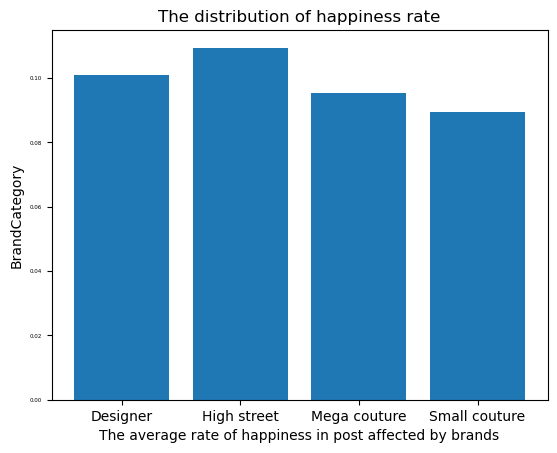

In [109]:
withface = df[df['ProductOnly'] < 0.4] # filter the photos without face

withface2 = withface[withface['Face'] > 0.4] # double-filter the photos without face

happyemo = withface.groupby("BrandCategory").mean() # groupby Brand and get the average rate of happiness

data = happyemo["Happiness"] # get the data

label = happyemo.index.tolist() # get the brand name

plt.tick_params(axis='y', labelsize=4)
plt.xlabel('The average rate of happiness in post affected by brands')
plt.ylabel('BrandCategory')
plt.title('The distribution of happiness rate')
plt.bar(label, data) 
plt.show()

The results of the happiness ratio occurring in four categories are in line with what I anticipated and fairly well with my earlier analysis of categories. In the following table, High Street, with the cheapest average price and very close distance from the general public, shows the highest happiness ratio in the dataset, followed by Designer, which constituted a large number of brands with different styles where some of them show a strong sense of distance while some are approachable. The other two categories indicate a relatively low ratio of happiness, especially in small couture, which accounts for the lowest happiness ratio, resulted from the reason that they are mainly used to serve the upper class to show off their uniqueness and exclusivity.

The Standard deviation is displayed in the table below. The fact that the standard rank and average happiness ratio are the same is not surprising. The Designer category, having bunches of brand, has a higher value Std than Mega couture and Small courture, which is fairly reasonable. However, the Std value of High street again accounts for a value that other categories cannot compare, may come from incomparable number of posts, based on its near distance to regular people, generated unclean data. 

[0.26873272141879895, 0.2847398297765662, 0.2597322665590063, 0.25448721580226685]


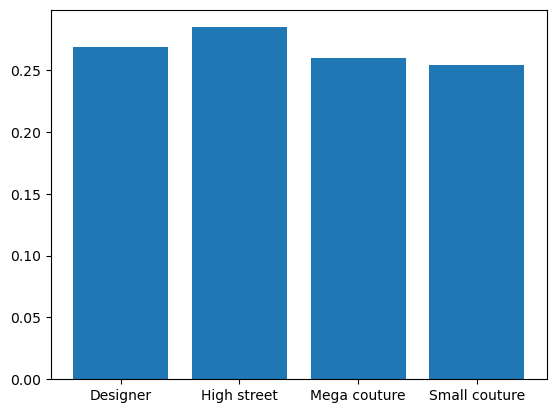

In [110]:
d = []
for i in label:
    ca = withface.loc[withface['BrandCategory'] == i, :]
    d.append(ca['Happiness'].std())

print(d)
plt.bar(label, d) 
plt.show()

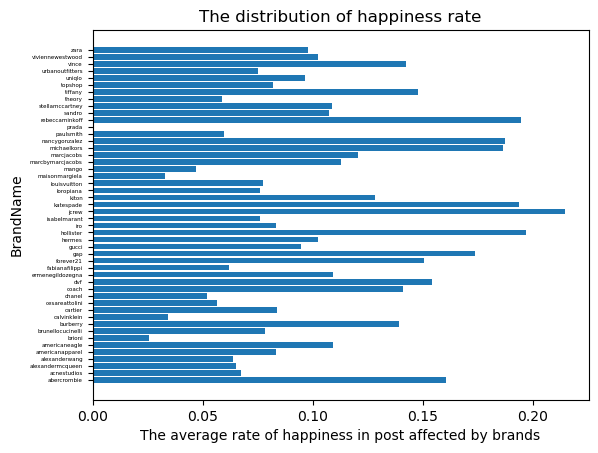

In [111]:
import matplotlib.pyplot as plt

withface = df[df['ProductOnly'] < 0.4] # filter the photos without face

withface2 = withface[withface['Face'] > 0.4] # double-filter the photos without face

happyemo = withface.groupby("BrandName").mean() # groupby Brand and get the average rate of happiness

data = happyemo["Happiness"] # get the data

label = happyemo.index.tolist() # get the brand name

plt.tick_params(axis='y', labelsize=4)
plt.xlabel('The average rate of happiness in post affected by brands')
plt.ylabel('BrandName')
plt.title('The distribution of happiness rate')
plt.barh(label, data) 
plt.show()

In [112]:
# average price collected from new arrival sub-data from its website
price = [103, 245, 253, 264, 189, 156, 563, 196, 123, 503, 182, 289, 301, 121, 108, 163, 267, 112, 99, 182, 194, 88, 189, 220,72, 89, 123, 246, 276, 380, 345, 145, 138, 94 ,96, 293, 600, 72, 134,138,284, 108, 204, 168, 234, 115, 146, 160]
happyemo['price'] = price
happyemo['price'] = (happyemo['price']-happyemo['price'].mean())/(happyemo['price'].std()) #Standardize Price Data in DataFrame
mod = smf.ols(formula = 'Happiness ~ price', data=happyemo)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     127.1
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           7.82e-15
Time:                        00:12:31   Log-Likelihood:                 107.19
No. Observations:                  48   AIC:                            -210.4
Df Residuals:                      46   BIC:                            -206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1044      0.004     27.312      0.0

The aforementioned graph merely serves to illustrate the relationship between a brand and the average happiness rate as determined by photo-tech API. It demonstrates that brands with high customer post happiness rates also have high average happiness rates on their shopping website images. For example, Gap and Hollister are the representatives of brands with an average high happiness rate, and if we go to their websites where we could find that the models in their advertising image smile.

Additionally, we performed a regression analysis using the data from the happiness ratio and the average price of new products on the brand's website (new products are more representative of the brand's pricing than hot products). We were surprised to discover that the correlation between the average price and the average price reached -0.04 and was significant at the confidence interval (p = 0.00). We believe that as the price of the brand's products rises, the price of the brand also rises. We think that as the cost of branded goods rises, consumer contentment is expressed less positively on social media. 

![gap](/Users/adair/Downloads/dataverse_files/Gap.png "Gap")

In contrast, as an example, Maison Margiela, with only 0.04 percent happiness, is one of the brands with a shockingly low happiness rate. We won't be shocked to see that none of its models are grinning in the image from its website, which is displayed below.

![gap](/Users/adair/Downloads/dataverse_files/MaisonMargiela.png "Maison Margiela")

I believe that the data after processing can be used to test the relationship, for the reason that I first used the column index ‘face’, which indicates the possibility of any human face occurring in posts. Besides, there is a problem while collecting the data by using the hashtag of brand, it’s possible to collect some unrelated posts. An effective solution is using Google Cloud API to evaluate the ratio of ‘fashion’ by its Caption and image and eliminate the posts which are lower than a threshold.

In fact, the relationship between brands and customers is highly verified before the era of the digital internet. According to (Catenaccio, Paola 2007), they believe that the fashion industry, which includes high-street retailers that popularize clothing at affordable prices for the mass market as well as international fashion houses that design for a small elite, plays a significant role in determining, frequently in a way that is determined by culture. From the perspective of customers, they saw the advertisement, which was purposefully created by the brand to target consumers who share their values or are similar to them, and they unconsciously imagined themselves as the person in the advertisement. One of the most well-known and well-liked luxury companies in the world, Channel, for instance, regularly portrays a graceful, endearing, elegant and charming feminine figure in its advertisements, inspiring the desire of the viewer to emulate her.

Similarly, Anand Thakur (2016) indicates the perceived significance of emotional attachment and attitudinal brand loyalty is high in luxury fashion purchases and the emotional attachment, especially the feeling of envy and imitation, positively enhances female consumers’ attitudinal brand loyalty. 

In addition, what makes me astonishing is that the posts written by customers will continue to contagion other customers' understanding and perspective to brand culture, which keeps the ‘Heritage’ of culture propagating. Actually, Giri (2018) used Levi’s and Zara to test the hypothesis above and get the conclusion that social media such as Twitter can serve to be the repository of consumer sentiments and opinions.

In conclusion, the relationship between brand culture and customer emotional status on social media is very tight. By classifying the brands and figuring out the average happiness level, we discovered that consumers of traditional luxury brand Mega couture and niche luxury brand Small couture express relatively little happiness on social media, in contrast to the High Street category, where customers frequently do so because of the product's high price performance and accessibility. Meanwhile, due to the characteristic of ‘Designer’ containing a large number of brands with different cultures aiming at diverse customers, the Standard deviation value of it takes the highest rank among 4 categories. At the same time, we double-check the result by searching and collecting the image from the brand website and realize that the brand with its customer who shows lower happy emotion will have fewer smiling models on its websites. Besides, the average price listed on the NEW ARRIVAL of Brand website was manually calculated. I then performed a regression analysis between the average price and the happy emotion, and I was surprised to find the discovery that the correlation between the average price and the average price reached -0.04 and was significant at the confidence interval. This is what we would like to do in the following step. We think that the brand's pricing will increase as the cost of its items does and customer contentment is expressed less favorably on social media when the price of branded goods increases.

## Reference
1.	Thakur, Anand, and Rupinderdeep Kaur. "An empirical examination of relationship between emotional attachment and attitudinal brand loyalty towards luxury fashion brands." DLSU Business & Economics Review 26.1 (2016): 70-80.
2.	Butcher, Luke, Ian Phau, and Min Teah. "Brand prominence in luxury consumption: will emotional value adjudicate our longing for status?." Journal of Brand Management 23.6 (2016): 701-715.
3.	Kim, Sooyun, et al. "Customer emotions and their triggers in luxury retail: Understanding the effects of customer emotions before and after entering a luxury shop." Journal of Business Research 69.12 (2016): 5809-5818.
4.	Kam, Seonju, and Youngsun Yoo. "Practice of sustainable fashion design considering customer emotions and personal tastes." Frontiers in Psychology 13 (2022): 976471-976471.
5.	Giri, Chandadevi, et al. "Analysis of consumer emotions about fashion brands: An exploratory study." Data Science and Knowledge Engineering for Sensing Decision Support: Proceedings of the 13th International FLINS Conference (FLINS 2018). 2018.
6.	Tomasello, Michael. "The human adaptation for culture." Annual review of anthropology 28 (1999).
7.	Kim, Dongyoup, Hyowon Hyun, and Jungkun Park. "The effect of interior color on customers’ aesthetic perception, emotion, and behavior in the luxury service." Journal of Retailing and Consumer Services 57 (2020): 102252.
8.	So, Jing Theng, Andrew Grant Parsons, and Sheau‐Fen Yap. "Corporate branding, emotional attachment and brand loyalty: the case of luxury fashion branding." Journal of Fashion Marketing and Management: An International Journal (2013).